# COGS 108 - EDA Checkpoint

# Names

- Amogh Manjunath
- Govinda Sahoo
- Jonathan Ly
- Rohan Sreedhar

<a id='research_question'></a>
# Research Question

What metrics are correlated with passenger/customer satisfaction on airlines? How could different types of delays impact customer satisfaction?

# Setup

In [1]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys  
from sklearn.linear_model import LinearRegression

# Data Cleaning

Open the two datafiles we are using and create dataframes using pandas

In [3]:
satData = pd.read_excel("satisfaction.xlsx")
delayData = pd.read_csv("delays.csv", dtype={"ORIGIN_AIRPORT": "string", "DESTINATION_AIRPORT": "string"})

Let's look at the details of the 'Satisfaction' dataset:

In [4]:
satData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

We don't need the first column, 'id', since this column will have no correlation to what we are trying to discover. 

In [5]:
#drop first column
satData.drop(columns=satData.columns[0], axis=1, inplace=True)

A bunch of the columns contain categorical data, for example, given as integers 0 through 5. These are listed as 'int64' types, but we really want the data to be of the type 'category' 

In [6]:
toCategory = [0, 1, 2, 4, 5] + list(range(7, 21))
satData.iloc[:,toCategory] = satData.iloc[:,toCategory].astype('category')
satData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction_v2                    129880 non-null  category
 1   Gender                             129880 non-null  category
 2   Customer Type                      129880 non-null  category
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  category
 5   Class                              129880 non-null  category
 6   Flight Distance                    129880 non-null  int64   
 7   Seat comfort                       129880 non-null  category
 8   Departure/Arrival time convenient  129880 non-null  category
 9   Food and drink                     129880 non-null  category
 10  Gate location                      129880 non-null  category
 11  Inflight wifi service     

/var/folders/rj/3yctx96n3v327_w38flyx02h0000gn/T/ipykernel_73606/605986568.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  satData.iloc[:,toCategory] = satData.iloc[:,toCategory].astype('category')


In [7]:
satData

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


We've cleaned up the data to eliminate unnecessary columns and change any incorrect datatypes to more accurate ones. 
Now we look at the delayData info. 

In [8]:
delayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       string 
 8   DESTINATION_AIRPORT  string 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

We don't need most of these columns. We only need the ones pertaining to delays. 

In [9]:
delayData.drop(columns=delayData.columns[0:11], axis=1, inplace=True)
delayData.drop(columns=delayData.columns[1:11], axis=1, inplace=True)
delayData.drop(columns=delayData.columns[2:5], axis=1, inplace=True)

We also want to remove any observations where the departure delays and arrival delays are both negative or 0. This likely indicates that the flight departed and arrived early or on-time.

We'll also delete observations where all the contributing factors for delays are NaN.

In [10]:
delayData = delayData.drop(delayData.index[(delayData['DEPARTURE_DELAY'] <= 0) & (delayData['ARRIVAL_DELAY'] <= 0)])
delayData = delayData.dropna(subset=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])

In [11]:
delayData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DEPARTURE_DELAY      1063439 non-null  float64
 1   ARRIVAL_DELAY        1063439 non-null  float64
 2   AIR_SYSTEM_DELAY     1063439 non-null  float64
 3   SECURITY_DELAY       1063439 non-null  float64
 4   AIRLINE_DELAY        1063439 non-null  float64
 5   LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 6   WEATHER_DELAY        1063439 non-null  float64
dtypes: float64(7)
memory usage: 64.9 MB


In [12]:
delayData

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,12.0,25.0,25.0,0.0,0.0,0.0,0.0
30,72.0,43.0,43.0,0.0,0.0,0.0,0.0
35,0.0,15.0,0.0,0.0,15.0,0.0,0.0
50,-3.0,20.0,20.0,0.0,0.0,0.0,0.0
52,95.0,85.0,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...
5819023,21.0,20.0,0.0,0.0,17.0,3.0,0.0
5819051,16.0,28.0,12.0,0.0,16.0,0.0,0.0
5819057,13.0,28.0,15.0,0.0,13.0,0.0,0.0
5819069,159.0,159.0,0.0,0.0,159.0,0.0,0.0


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

Let's take a look at our satisfaction data again. 

In [13]:
satData.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


We see some of the data are strings, while others are numeric. The numeric ones are mostly categorical, with 0 being the worst and 5 being the best, while some other numeric data being continuous like in the delay columns. 

In the interest of being able to run a linear regression on this data, we want to convert some of the data to numeric values. 

In [37]:
satData['satisfaction_v2'] = satData['satisfaction_v2'].replace(['satisfied'], 1)
satData['satisfaction_v2'] = satData['satisfaction_v2'].replace(['neutral or dissatisfied'], -1)

satData['Class'] = satData['Class'].replace(['Eco'], 1)
satData['Class'] = satData['Class'].replace(['Eco Plus'], 2)
satData['Class'] = satData['Class'].replace(['Business'], 3)

Now let's convert any of the NaN values in the 'Arrival Delay in Minutes' column to 0s

In [38]:
satData['Arrival Delay in Minutes'] = satData['Arrival Delay in Minutes'].fillna(0)
satData.isnull().all().any()

False

Now we will set our input and label variables (X and y) and set them to specific columns. Note that we will be leaving out some of the first few columns, since these are not metrics controllable by airlines. We want to focus on metrics that can be changed.  

In [39]:
X = satData.iloc[:, 5:] # Select the 5th column and after
y = satData.iloc[:, 0] # Select only the first column
lr = LinearRegression()
lr.fit(X, y)

coefficients = pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                                   Coefficient
Inflight entertainment                0.256515
Class                                 0.164717
Ease of Online booking                0.115223
On-board service                      0.089483
Seat comfort                          0.083163
Leg room service                      0.073136
Checkin service                       0.070313
Online support                        0.043465
Gate location                         0.028731
Online boarding                       0.019905
Baggage handling                      0.007207
Departure Delay in Minutes            0.000549
Flight Distance                      -0.000032
Arrival Delay in Minutes             -0.001761
Cleanliness                          -0.002692
Inflight wifi service                -0.031645
Departure/Arrival time convenient    -0.042889
Food and drink                       -0.071620


The coefficients we just got tell us the relationship between each variable on the left and the label: satisfied or not satisfied (or -1 and +1 since we just changed it). This is an interesting result. As you saw with our initial research question, we expected flight delays to have a significant impact on the satisfaction rates of air travel. However our data shows that not only do the departure delays have a very insignificant positive correlation with satisfaction rate, but arrival delays have a very small negative correlation. As of now, the variable with the most correlation with satisfaction is inflight entertainment, followed by class and ease of online booking.  Let's take a deeper look at the data that is correlating and the data that isn't.

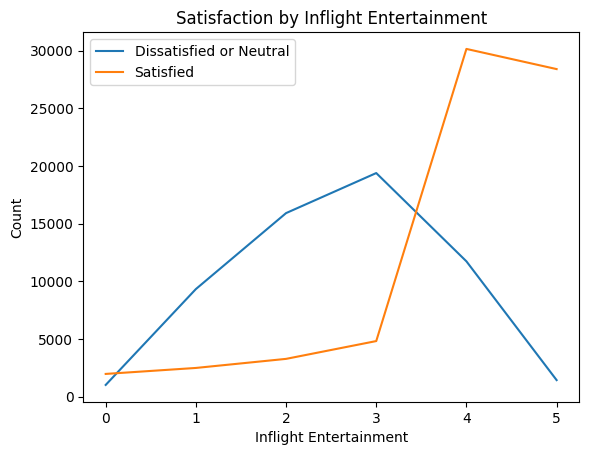

In [33]:
entertainmentGroup = satData.groupby(["Inflight entertainment", "satisfaction_v2"]).size().reset_index(name="count")
entertainmentPivot = entertainmentGroup.pivot(index="Inflight entertainment", columns="satisfaction_v2", values="count")
entertainmentPivot.plot(kind="line")
plt.title("Satisfaction by Inflight Entertainment")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Count")
plt.legend(["Dissatisfied or Neutral", "Satisfied"])
plt.show()

This graph shows us that people who had good inflight entertainment experiences (4 or 5) were more likely to say they were satisfied, whereas people who gave the inflight entertainment average ratingings (3) were more likely to say they were dissatsfied or neutral. 

Let's now look at the relationship between class and satisfaction.

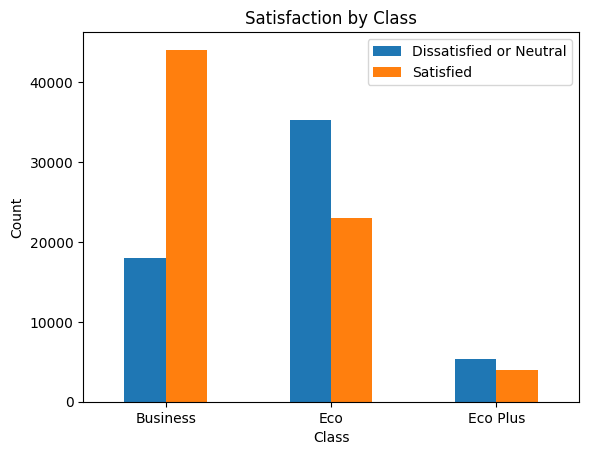

In [48]:
classGroup = satData.groupby(["Class", "satisfaction_v2"]).size().reset_index(name="count")
classPivot = classGroup.pivot(index="Class", columns="satisfaction_v2", values="count")
classPivot.plot(kind="bar")
plt.title("Satisfaction by Class")
plt.xlabel("Class")
plt.ylabel("Count")
bars = ("Business","Eco","Eco Plus")
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, rotation=0)
plt.legend(["Dissatisfied or Neutral","Satisfied"])
plt.show()

It seems we see a trend that aligns with our linear regression results here as well. It shows that people in business class were more likely to be satisfied with the flying experience, and people in economy class were more likely to be dissatisfied or neutral about it. 

Now let's look at the relationship between delays and satisfaction. Let's specifically look at departure delays, since those have a marginally positive correlation with satisfaction. We'll split the delay values into 60 minute intervals.

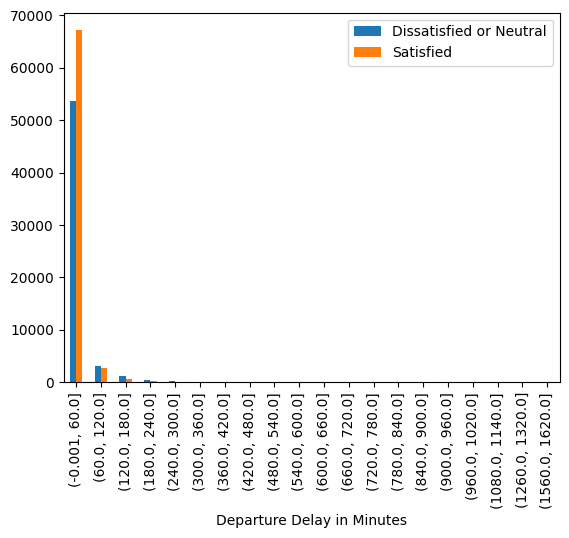

In [58]:
delay_intervals = pd.cut(satData['Departure Delay in Minutes'], bins=range(0, satData['Departure Delay in Minutes'].max() + 60, 60), include_lowest=True)
count_df = satData.groupby(delay_intervals)['satisfaction_v2'].value_counts().unstack().fillna(0)
count_df = count_df[count_df.sum(axis=1) > 0]
count_df.plot(kind='bar')
plt.legend(["Dissatisfied or Neutral","Satisfied"])
plt.show()

It seems most of the data is bunched to the 0-60 minute interval. Let's zoom in and change the scale of the x-axis to get a better understanding of what our values are. 

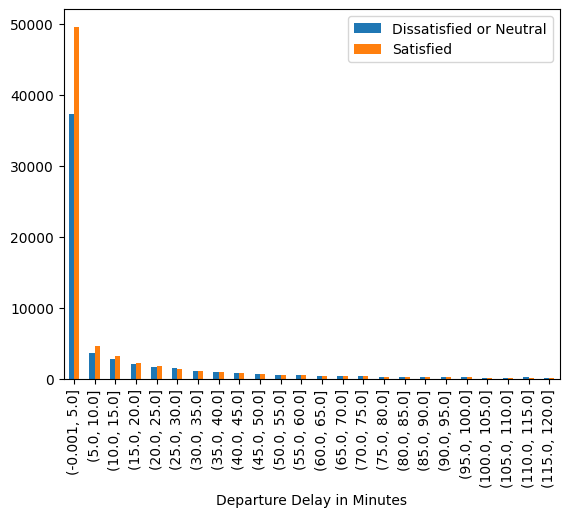

In [98]:
under120 = satData[satData['Departure Delay in Minutes'] <= 120]
delay_intervals = pd.cut(under120['Departure Delay in Minutes'], bins=range(0, under120['Departure Delay in Minutes'].max() + 5, 5), include_lowest=True)
count_df = under120.groupby(delay_intervals)['satisfaction_v2'].value_counts().unstack().fillna(0)
count_df = count_df[count_df.sum(axis=1) > 0]
count_df.plot(kind='bar')
plt.legend(["Dissatisfied or Neutral","Satisfied"])
plt.show()

Let's see what is our most prevalent delay value.

In [111]:
valCounts = satData['Departure Delay in Minutes'].value_counts()
print(valCounts)

0      73356
1       3682
2       2855
3       2535
4       2309
       ...  
366        1
569        1
419        1
411        1
320        1
Name: Departure Delay in Minutes, Length: 466, dtype: int64


It seems that 0 is our most common delay value. Let's see what percentage of these flights had 0 departure delay. 

In [112]:
percent0 = valCounts[0]/len(satData['Departure Delay in Minutes'])
print(percent0) 

0.5647982753310749


So it appears 56.48% our data is comprised of flights with no delay. This is unfortunate because it is hard to make an informed inference on how much the delay affects airline satisfaction, when most flights in this dataset seem to have 0 delay.  

We can still see what factors tend to cause delays the most. We will analyze the columns containing delay reasons.

In [155]:
cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
delayTotals = delayData[cols].sum()
sumDelay = sum(delayTotals)
print(delayTotals/sumDelay)

AIR_SYSTEM_DELAY       0.228816
SECURITY_DELAY         0.001293
AIRLINE_DELAY          0.321985
LATE_AIRCRAFT_DELAY    0.398423
WEATHER_DELAY          0.049483
dtype: float64


Here we see that the biggest factor in flight delays are aircraft being late, with no further explanation given. This is followed by delays within the airline, and that is followed by issues with the air system. 